# PART 1: ACTIVE LEARNING

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('bitcoin_prices_3.csv')
df['Start'] = pd.to_datetime(df['Start'])
df = df.sort_values(by='Start')
df

,Start,End,Open,High,Low,Close,Volume,Market Cap
5094,2010-07-17,2010-07-18,0.0500,0.0500,0.0500,0.0500,0.000000e+00,0.000000e+00
5093,2010-07-18,2010-07-19,0.0858,0.0858,0.0858,0.0858,0.000000e+00,0.000000e+00
5092,2010-07-19,2010-07-20,0.0808,0.0808,0.0808,0.0808,0.000000e+00,0.000000e+00
5091,2010-07-20,2010-07-21,0.0747,0.0747,0.0747,0.0747,0.000000e+00,0.000000e+00
5090,2010-07-21,2010-07-22,0.0792,0.0792,0.0792,0.0792,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
4,2024-06-23,2024-06-24,64276.0400,64521.0300,63290.4300,63290.4300,6.853945e+10,1.265327e+12
3,2024-06-24,2024-06-25,63168.0300,63316.0100,58946.2400,60382.8100,8.828355e+10,1.211101e+12
2,2024-06-25,2024-06-26,60317.9900,62231.1600,60272.5800,61789.9800,1.050312e+11,1.208415e+12
1,2024-06-26,2024-06-27,61733.9900,62357.5800,60761.2400,60761.2400,1.017576e+11,1.210544e+12


In [4]:
df['pct_change'] = df['Close'].pct_change().fillna(0)
df = df[['Start', 'Open', 'Close', 'pct_change']]
df

,Start,Open,Close,pct_change
5094,2010-07-17,0.0500,0.0500,0.000000
5093,2010-07-18,0.0858,0.0858,0.716000
5092,2010-07-19,0.0808,0.0808,-0.058275
5091,2010-07-20,0.0747,0.0747,-0.075495
5090,2010-07-21,0.0792,0.0792,0.060241
...,...,...,...,...
4,2024-06-23,64276.0400,63290.4300,-0.015284
3,2024-06-24,63168.0300,60382.8100,-0.045941
2,2024-06-25,60317.9900,61789.9800,0.023304
1,2024-06-26,61733.9900,60761.2400,-0.016649


In [5]:
df['cum_mult'] = (1 + df['pct_change'].abs()).rolling(window=15, min_periods=1).apply(np.prod, raw=True)
df = df[(df['Start'] >= '2021-01-01') & (df['Start'] <= '2022-06-30')]

C:\Users\pryty\AppData\Local\Temp\ipykernel_9564\3493993017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cum_mult'] = (1 + df['pct_change'].abs()).rolling(window=15, min_periods=1).apply(np.prod, raw=True)


C:\Users\pryty\AppData\Local\Temp\ipykernel_9564\3110582733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cum_mult_norm'] = (df['cum_mult'] / df['cum_mult'].sum())


<Axes: xlabel='Start'>

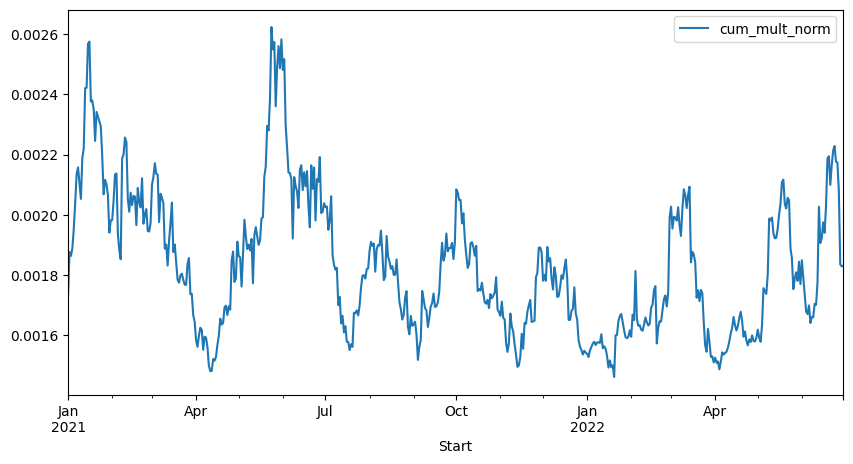

In [6]:
df['cum_mult_norm'] = (df['cum_mult'] / df['cum_mult'].sum())
df.plot(x='Start', y='cum_mult_norm', figsize=(10, 5))

In [7]:
# random_selected_items = random.sample(df['Start'].tolist(), k=200)
indices = np.linspace(0, len(df) - 1, 200, dtype=int)
equally_distributed_items = df.iloc[indices]['Start'].tolist()

# To avoid repeating
xor_result = list(set(equally_distributed_items) ^ set(df['Start'].tolist()))
xor_indices = df[df['Start'].isin(xor_result)].index
xor_weights = df.loc[xor_indices, 'cum_mult_norm']

weighted_selected_items = np.random.choice(
    xor_result,     
    replace=False,
    p=(xor_weights / xor_weights.sum()),
    size=100
)

In [8]:
# For the 'rand' column (count of random selections)
df['linspace'] = df['Start'].apply(lambda x: equally_distributed_items.count(x) if x in equally_distributed_items else 0)

# For the 'wrand' column (count of weighted selections)
df['wrand'] = df['Start'].apply(lambda x: np.sum(np.isin(weighted_selected_items, [x])) if x in weighted_selected_items else 0)

C:\Users\pryty\AppData\Local\Temp\ipykernel_9564\443819929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['linspace'] = df['Start'].apply(lambda x: equally_distributed_items.count(x) if x in equally_distributed_items else 0)
C:\Users\pryty\AppData\Local\Temp\ipykernel_9564\443819929.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wrand'] = df['Start'].apply(lambda x: np.sum(np.isin(weighted_selected_items, [x])) if x in weighted_selected_items else 0)


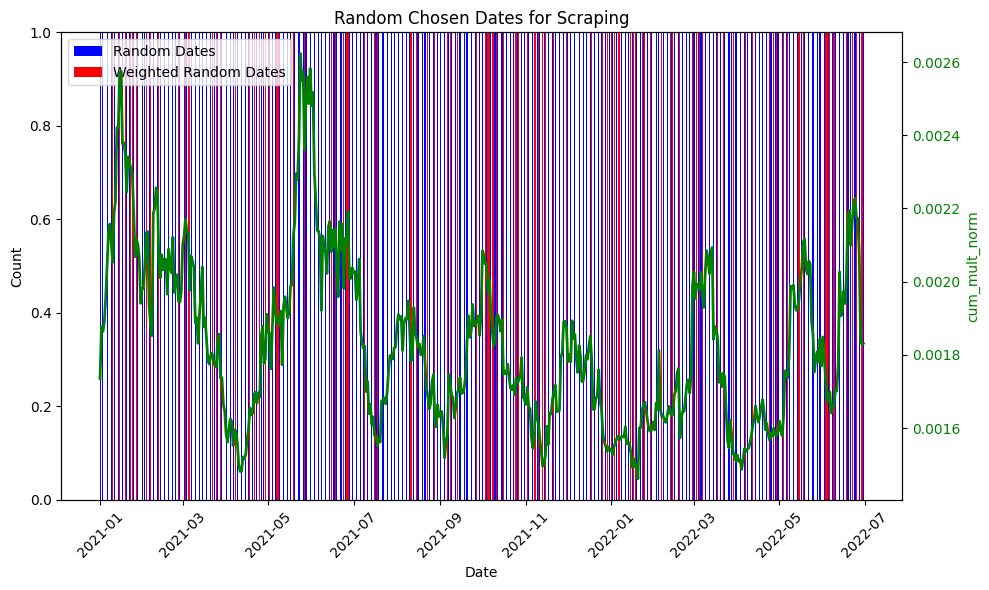

In [9]:
# Create the bar plot first
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for the difference between closing and opening prices
ax1.bar(df['Start'], df['linspace'], label='Random Dates', color='blue')
ax1.bar(df['Start'], df['wrand'], label='Weighted Random Dates', bottom=df['linspace'], color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Count')
ax1.set_title('Random Chosen Dates for Scraping')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

# Create a second y-axis to overlay the line plot
ax2 = ax1.twinx()

# Line plot for 'cum_mult_norm'
ax2.plot(df['Start'], df['cum_mult_norm'], label='cum_mult_norm', color='green', linewidth=2)
ax2.set_ylabel('cum_mult_norm', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Tight layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

In [23]:
linespace = [x.date() for x in equally_distributed_items]
weighted_random = [x.date() for x in weighted_selected_items]
print(linespace[:5])
print(weighted_random[:5])

[datetime.date(2021, 1, 1), datetime.date(2021, 1, 3), datetime.date(2021, 1, 6), datetime.date(2021, 1, 9), datetime.date(2021, 1, 11)]
[datetime.date(2021, 11, 2), datetime.date(2022, 6, 6), datetime.date(2021, 3, 25), datetime.date(2021, 6, 15), datetime.date(2022, 6, 29)]


In [ ]:
# with open('Apify_Tweets\weighted_random_dates.txt', 'w') as f:
#     for date in weighted_random:
#         f.write(f"{date.isoformat()}\n")

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\pryty\AppData\Local\Temp\ipykernel_9564\2615249855.py:1: SyntaxWarning: invalid escape sequence '\w'
  with open('Apify_Tweets\weighted_random_dates.txt', 'w') as f:


# PART 2: APIFY

In [ ]:
import datetime
with open('Apify_Tweets\linespace_dates.txt', 'r') as f:
    linespace = [datetime.date.fromisoformat(line.strip()) for line in f]
    
with open('Apify_Tweets\weighted_random_dates.txt', 'r') as f:
    weighted_random = [datetime.date.fromisoformat(line.strip()) for line in f]

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\pryty\AppData\Local\Temp\ipykernel_9564\4158373045.py:2: SyntaxWarning: invalid escape sequence '\l'
  with open('Apify_Tweets\linespace_dates.txt', 'r') as f:
C:\Users\pryty\AppData\Local\Temp\ipykernel_9564\4158373045.py:5: SyntaxWarning: invalid escape sequence '\w'
  with open('Apify_Tweets\weighted_random_dates.txt', 'r') as f:
